In [2]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import matplotlib as matplotlib
from matplotlib import animation, rc
rc('animation', html='jshtml')
from matplotlib.pyplot import cm

In [3]:
### re-Defining Himmelblau function ###
def himmelblau(x):
    return np.power((np.power(x[0],2)+x[1]-11),2)+np.power((x[0]+np.power(x[1],2)-7),2)


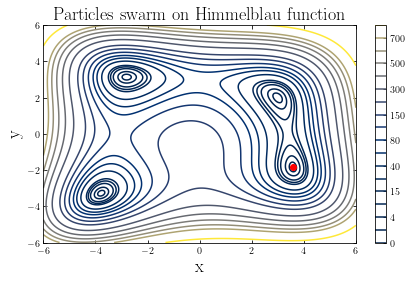

In [4]:
f = himmelblau

Nr_dimensions = 2
Nr_particles  = 50
Nr_iterations = 50

w, phi_p, phi_g  = 0.1, 0.1, 0.35
x_lower, x_upper = -6, 6
y_lower, y_upper = -6, 6

xs = np.random.uniform(low = x_lower, high = x_upper, size = Nr_particles)
ys = np.random.uniform(low = y_lower, high = y_upper, size = Nr_particles)
positions         = np.array([[xs[i],ys[i]] for i in range(len(xs))])
best_positions    = deepcopy(positions)
history           = [deepcopy(positions)]

function_vals     = np.array([himmelblau(best_positions[i]) for i in range(len(best_positions))])
best_position     = best_positions[np.argmin(function_vals)]

v_xs = np.random.uniform(low = -np.abs(x_upper - x_lower), high = np.abs(x_upper - x_lower), size = Nr_particles)
v_ys = np.random.uniform(low = -np.abs(y_upper - y_lower), high = np.abs(y_upper - y_lower), size = Nr_particles)
velocities = np.array([[v_xs[i],v_ys[i]] for i in range(len(xs))])


for iteration in range(Nr_iterations):
    for i in range(Nr_particles):
        rands    = np.random.uniform(low = 0, high = 1, size = Nr_dimensions)
        r_p, r_g = rands[0], rands[1] 
        for d in range(Nr_dimensions):
            velocities[i][d] = w * velocities[i][d] + phi_p * r_p * (best_positions[i][d] - positions[i][d]) + phi_g * r_g * (best_position[d] - positions[i][d])
            positions[i][d] += velocities[i][d]
        if f(positions[i]) < f(best_positions[i]):
            best_positions[i] = positions[i]
            if f(best_positions[i]) < f(best_position):
                best_position = best_positions[i]
    history.append(deepcopy(positions))

plt.rc('text', usetex=True)
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

## Defining x- & y-limits for plot ##
xlims, ylims = [-6.0,6.0], [-6.0,6.0]

## Determining levels in function: i.e. Z = 0, 1, 4, 10.... ##
levels = [0,1,4,10,15,20,40,60,80,110,150,200,300,400,500,600,700,1000]

## Setting values for  contourplot ##
xlist = np.linspace(xlims[0],xlims[1],1000)
ylist = np.linspace(ylims[0],ylims[1],1000)
X, Y = np.meshgrid(xlist,ylist)
Z = np.power((np.power(X,2)+Y-11),2)+np.power((X+np.power(Y,2)-7),2)

color_maps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'viridis', 'plasma', 'inferno', 'magma', 'cividis']

## Defining plot ##
fig, ax = plt.subplots(1,1,figsize = (7,4))
ax.set_title('Particles swarm on Himmelblau function',size=18)
contour_plot = ax.contour(X,Y,Z, levels, antialiased=True,cmap = plt.get_cmap(color_maps[-1]))
fig.colorbar(contour_plot)
ax.set_xlim(xlims[0],xlims[1]), ax.set_ylim(ylims[0],ylims[1])
ax.set_xlabel("x",size=18), ax.set_ylabel("y",size=18)
ax.plot(best_position[0],best_position[1],'ro')
plt.show()

MovieWriter stderr:
ParticleSwarm.mp4: Read-only file system



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '2250x1350', '-pix_fmt', 'rgba', '-r', '5', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'ParticleSwarm.mp4']' returned non-zero exit status 1.

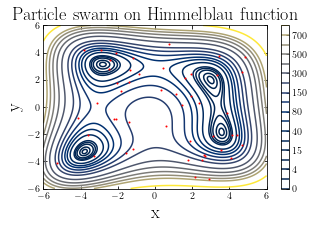

In [5]:

fig, ax = plt.subplots(1,1,figsize = (5,3))
ax.set_title('Particle swarm on Himmelblau function',size=18)
ax.set_xlabel("x",size=18), ax.set_ylabel("y",size=18)


contour_plot = ax.contour(X,Y,Z, levels, antialiased=True, cmap = plt.get_cmap(color_maps[-1]))
fig.colorbar(contour_plot)

generations, = ax.plot([],[],'o',color='r',ms = 1,label='ith generation')


def update(i):
    generations.set_data(history[i][:,0],history[i][:,1])

    return generations, 


ax.set_xlim(xlims[0],xlims[1])
ax.set_ylim(ylims[0],ylims[1])


anim = animation.FuncAnimation(fig,
                               update,
                               frames       = len(history),
                               interval     = 70,
                               blit         = True,
                               repeat_delay = 0)
# Set up formatting for the movie files

## uncomment below to save gif ##
writervideo = animation.FFMpegWriter(fps=5)
anim.save("ParticleSwarm.mp4", dpi=450, writer=writervideo)   

anim